In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_seml, model_type_map, dataset_map, plot_metrics_per_dataset, model_palette
import pandas as pd
import scvelo as scv
import os
import matplotlib.pyplot as plt
scv.set_figure_params()

/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[rank: 0] Global seed set to 0
/data/nasif12/home_if12/martensl/github_repos/scatac_poisson_private/poisson_atac/utils.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn-poster")
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/scvelo/settings.py:91: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead

In [3]:
fig_path = '/data/ceph/hdd/project/node_08/poisson_atac/panels/revision2/Figure2/'
data_path = '/s/project/poisson_atac/panels/revision2/Figure2/data/'

# Reconstruction metrics

In [4]:
model_order = [model_type_map['poissonvi'], model_type_map['binaryvi'], model_type_map["peakvi"]]
order = [dataset_map['neurips'], dataset_map['satpathy'], dataset_map['aerts'], dataset_map['trapnell']]

## Load experiments

In [6]:
seml_database='benchmark'
results = load_seml(seml_database)

100%|██████████| 240/240 [00:00<00:00, 1635.29it/s]


## Plot final results

In [7]:
df = results[results["config.model.model_type"].isin(model_order)] #filtering for test data

In [8]:
df['config.scvi.seed'] = df['config.scvi.seed'].astype(int)

In [9]:
df = df.sort_values(['config.data.dataset', 'config.model.model_type', 'config.scvi.seed'])

In [10]:
# save plotting data data
df.to_csv(os.path.join(data_path, 'reconstruction_df.csv'))

In [11]:
df = pd.read_csv(os.path.join(data_path, 'reconstruction_df.csv'), index_col=0)

[(('Poisson VAE', 'Poisson VAE'), ('Binary VAE', 'Binary VAE')), (('Poisson VAE', 'Poisson VAE'), ('PeakVI', 'PeakVI')), (('Binary VAE', 'Binary VAE'), ('PeakVI', 'PeakVI'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Poisson VAE_Poisson VAE vs. Binary VAE_Binary VAE: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.953e-03 Stat=0.000e+00
Binary VAE_Binary VAE vs. PeakVI_PeakVI: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.953e-03 Stat=0.000e+00
[(('Poisson VAE', 'Poisson VAE'), ('Binary VAE', 'Binary VAE')), (('Poisson VAE', 'Poisson VAE'), ('PeakVI', 'PeakVI')), (('Binary VAE', 'Binary VAE'), ('PeakVI', 'PeakVI'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



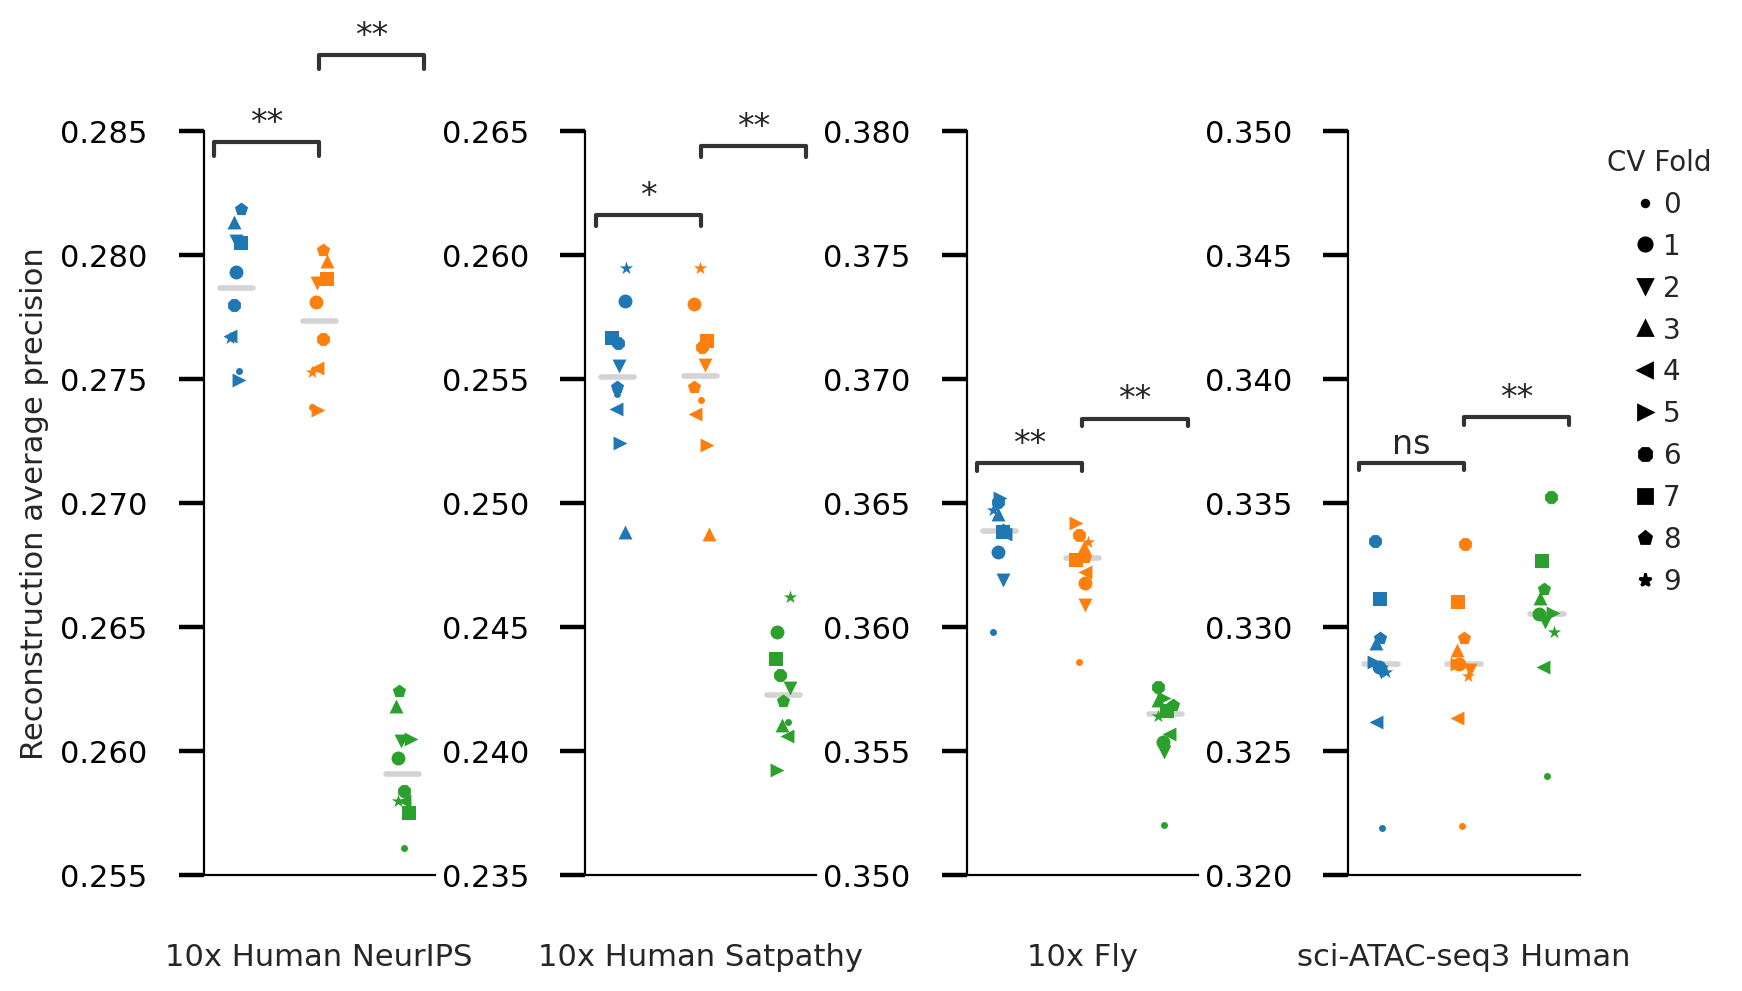

In [19]:
fig, axs = plt.subplots(
    ncols=4, 
    figsize=(8, 6), 
    gridspec_kw={'wspace': 0.65, 'left': 0.12}
) 
plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for i, dataset in enumerate(order):
    plot_metrics_per_dataset(
    data=df[df['config.data.dataset'] == dataset], 
    datasets=[dataset] , 
    x='config.model.model_type', 
    y='result.average_precision', 
    hue='config.model.model_type', 
    hue_order=model_order, 
    order=model_order,
    x_label=dataset, 
    y_label=("Reconstruction average precision" if i < 1 else " "), 
    figsize=(3,5), 
    test="Wilcoxon",
    pvalue_format='star',
    orient='v', ax=axs[i], 
    legend=(False if i < 3 else True),
    y_lim=True,
)
fig.savefig(os.path.join(fig_path, 'reconstruction', f'average_precision_grid_pvalue.pdf'), bbox_inches= "tight")
fig.savefig(os.path.join(fig_path, 'reconstruction',  f'average_precision_grid_pvalue.png'), bbox_inches= "tight")

[(('Poisson VAE', 'Poisson VAE'), ('Binary VAE', 'Binary VAE')), (('Poisson VAE', 'Poisson VAE'), ('PeakVI', 'PeakVI')), (('Binary VAE', 'Binary VAE'), ('PeakVI', 'PeakVI'))]
[(('Poisson VAE', 'Poisson VAE'), ('Binary VAE', 'Binary VAE')), (('Poisson VAE', 'Poisson VAE'), ('PeakVI', 'PeakVI')), (('Binary VAE', 'Binary VAE'), ('PeakVI', 'PeakVI'))]
[(('Poisson VAE', 'Poisson VAE'), ('Binary VAE', 'Binary VAE')), (('Poisson VAE', 'Poisson VAE'), ('PeakVI', 'PeakVI')), (('Binary VAE', 'Binary VAE'), ('PeakVI', 'PeakVI'))]
[(('Poisson VAE', 'Poisson VAE'), ('Binary VAE', 'Binary VAE')), (('Poisson VAE', 'Poisson VAE'), ('PeakVI', 'PeakVI')), (('Binary VAE', 'Binary VAE'), ('PeakVI', 'PeakVI'))]


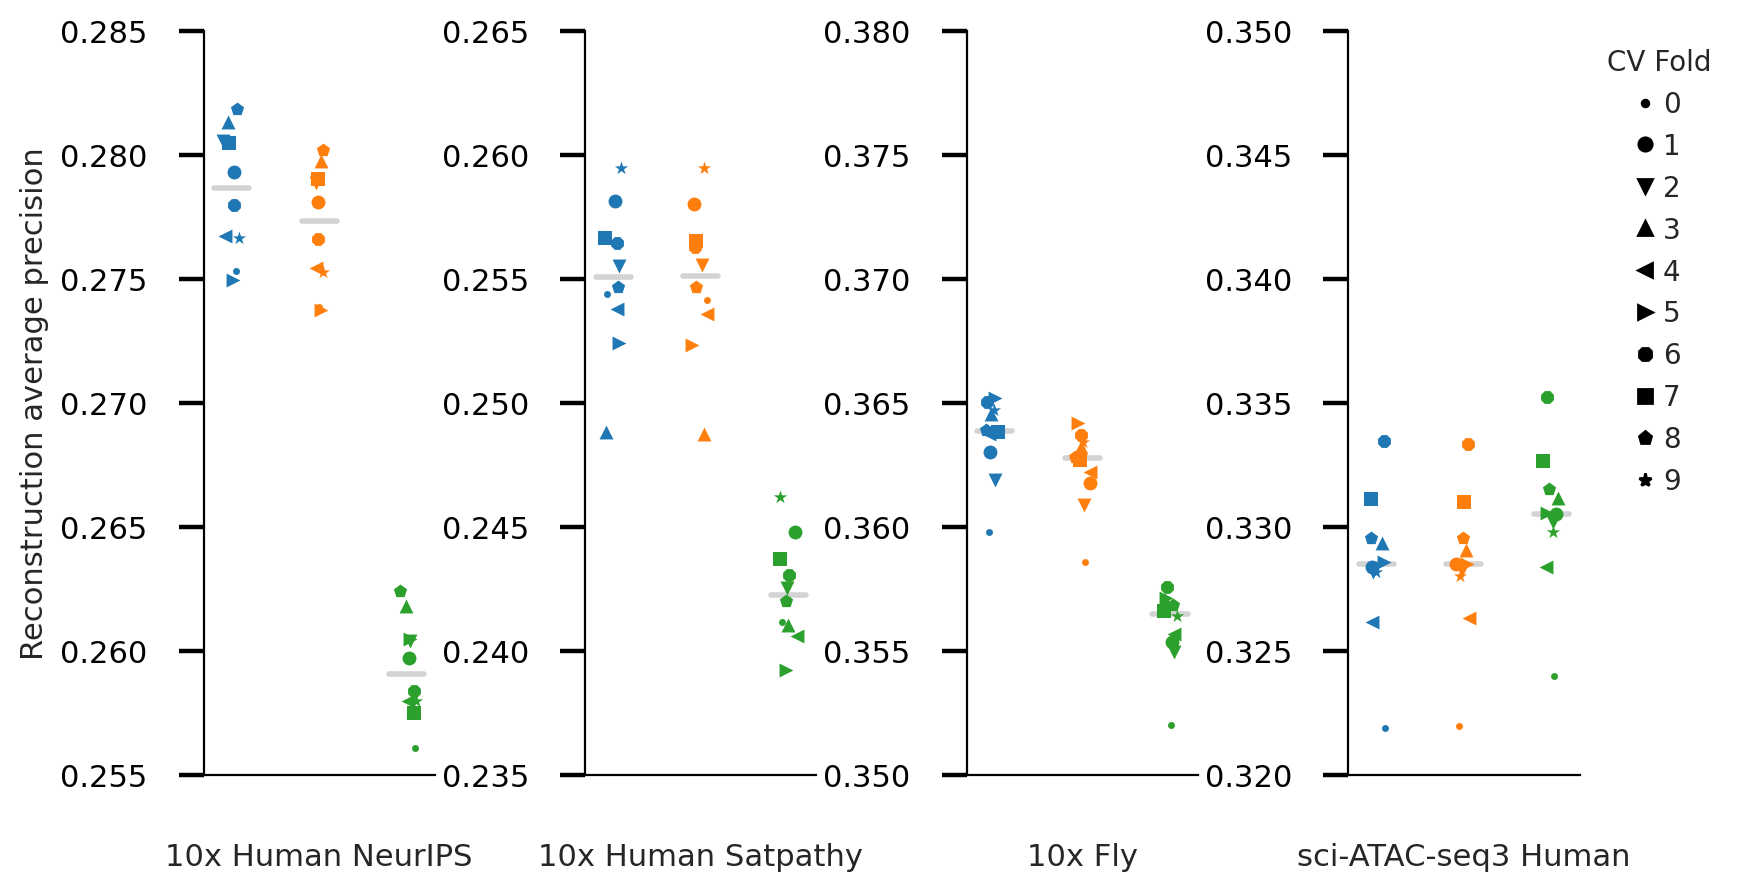

In [14]:
fig, axs = plt.subplots(ncols=4, figsize=(8, 6), gridspec_kw={'wspace': 0.65, 'left': 0.12}) #
plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for i, dataset in enumerate(order):
    plot_metrics_per_dataset(
    data=df[df['config.data.dataset'] == dataset], 
    datasets=[dataset] , 
    x='config.model.model_type', 
    y='result.average_precision', 
    hue='config.model.model_type', 
    hue_order=model_order, 
    order=model_order,
    x_label=dataset, 
    y_label=("Reconstruction average precision" if i < 1 else " "), 
    figsize=(3,5), 
    test=None,
    pvalue_format='star',
    orient='v', ax=axs[i], 
    legend=(False if i < 3 else True),
    y_lim=True
)
fig.savefig(os.path.join(fig_path, 'reconstruction', f'average_precision_grid_new.pdf'), bbox_inches= "tight")
fig.savefig(os.path.join(fig_path, 'reconstruction',  f'average_precision_grid_new.png'), bbox_inches= "tight")

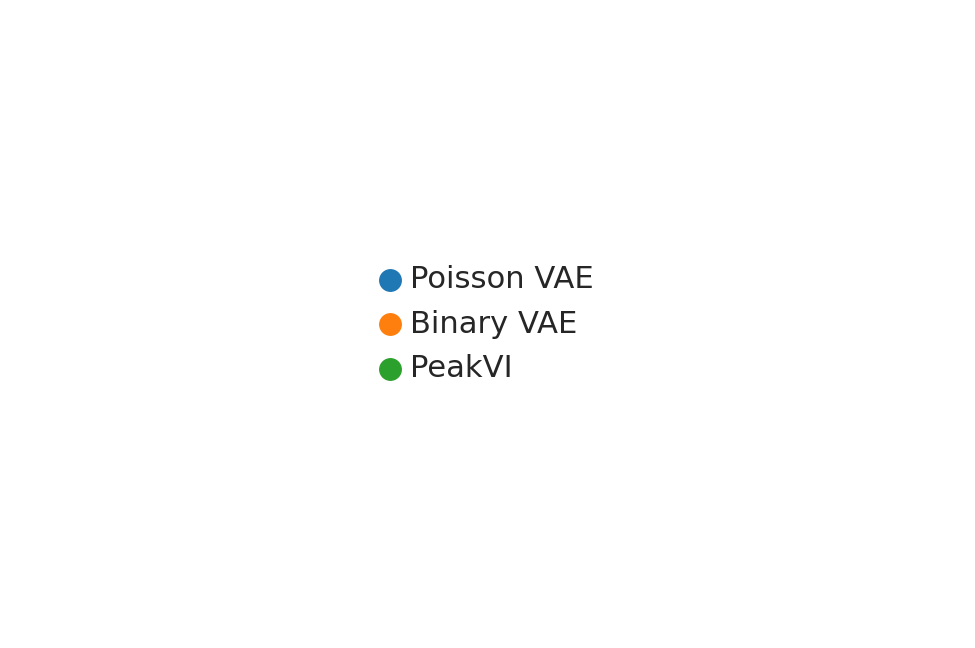

In [42]:
# Plot the legend separately
handles, labels = axs[0].get_legend_handles_labels()
plt.figure()
plt.axis('off')  # Turn off the axis
plt.legend(handles[:3], labels[:3], ncol=1, loc='center', frameon=False)

# Show the plots
plt.savefig(os.path.join(fig_path,  'reconstruction','legend.pdf'))
plt.savefig(os.path.join(fig_path,  'reconstruction','legend.png'))
plt.show()